# Twitter Sentiment Analysis Using CNN Model with Tensorflow & Keras!
by Daniel Tsai & Phillip Bonarigo!

# Import packages

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model  # to load saved model
import numpy as np
from numpy import loadtxt    # load dataset
import pandas as pd
import sqlite3 as sql
# from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(encoding='utf-8',stop_words='english', analyzer='word', binary=False)
import matplotlib.pyplot as plt


print(tf.__version__) #prints version of tensorflow

Using TensorFlow backend.


1.13.1


# Traing Parameters

In [2]:
NUM_EPOCHS_BASELINE = 20
NUM_BATCH_SIZE_BASELINE = 50
NUM_EPOCHS_DPT = 20
# NUM_WORDS = 12766


# Twitter API credentias (please keep it secret)

In [3]:
# we have removed the Twitter API keys but you can enter your own here

consumer_key = 'ENTER KEY'
consumer_secret = 'ENTER SECRET'
access_token = 'ENTER TOKEN'
access_token_secret = 'ENTER TOKEN'

# Connect database

In [4]:
# fix random seed for reproducibility
np.random.seed(7)

In [5]:
database = "database.sqlite"
connection = sql.connect(database)
query = '''SELECT * FROM Tweets'''
df = pd.read_sql_query(query, connection)

# Data Preparation (1) - One hot

In [6]:
#One-hot encoding

df['airline_sentiment'].replace('negative',0, inplace=True)
df['airline_sentiment'].replace('neutral',1, inplace=True)
df['airline_sentiment'].replace('positive',1, inplace=True)
dataset = df.values # covert the pandas dataframe to numpy array


# Data Preparation (2) - Split the dataset into traning set and validation set

In [7]:
validation_split_ratio = 0.8
validation_split = int(round(validation_split_ratio*dataset.shape[0],0))

X_train = dataset[0:validation_split,10]
X_train_vec = tfidfvectorizer.fit_transform(X_train)

X_validation = dataset[validation_split:,10]
X_validation_vec = tfidfvectorizer.transform(X_validation)

# print(X_train_vec.shape[0])
# print(X_train_vec.shape)

Y_train = dataset[0:validation_split,1]
Y_validation = dataset[validation_split:,1]
NUM_WORDS = X_train_vec.shape[1]
print(NUM_WORDS) #number of words in the dictionary


12766


In [8]:
## Create baseline model

In [9]:
# # create the base model

baseline_model = Sequential()
baseline_model.add(Dense(64, input_dim=NUM_WORDS, activation='relu'))
baseline_model.add(Dense(64, activation='relu'))
baseline_model.add(Dense(64, activation='relu'))
# baseline_model.add(Dense(64, activation='relu'))
# baseline_model.add(Dense(32, activation='relu'))
baseline_model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# Compile the model
baseline_model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', 'binary_crossentropy'])

In [11]:
# Fit (or Train) the baseline model
baseline_history = baseline_model.fit(X_train_vec,
                                      Y_train,
                                      epochs=NUM_EPOCHS_BASELINE,
                                      batch_size=NUM_BATCH_SIZE_BASELINE,
                                      validation_data=(X_validation_vec, Y_validation))



Instructions for updating:
Use tf.cast instead.
Train on 11588 samples, validate on 2897 samples
Epoch 1/20
11588/11588 [==============================] - 7s 646us/step - loss: 0.4562 - acc: 0.7763 - binary_crossentropy: 0.4562 - val_loss: 0.4388 - val_acc: 0.8029 - val_binary_crossentropy: 0.4388
Epoch 2/20
11588/11588 [==============================] - 7s 610us/step - loss: 0.2309 - acc: 0.9086 - binary_crossentropy: 0.2309 - val_loss: 0.4904 - val_acc: 0.8019 - val_binary_crossentropy: 0.4904
Epoch 3/20
11588/11588 [==============================] - 7s 604us/step - loss: 0.1356 - acc: 0.9493 - binary_crossentropy: 0.1356 - val_loss: 0.6208 - val_acc: 0.7846 - val_binary_crossentropy: 0.6208
Epoch 4/20
11588/11588 [==============================] - 7s 610us/step - loss: 0.0825 - acc: 0.9697 - binary_crossentropy: 0.0825 - val_loss: 0.7514 - val_acc: 0.7677 - val_binary_crossentropy: 0.7514
Epoch 5/20
11588/11588 [==============================] - 7s 611us/step - loss: 0.0486 - acc: 0

In [12]:
# evaluate the baseline model
scores_baseline = baseline_model.evaluate(X_validation_vec, Y_validation)
print("\n{}: {:.2f}".format(baseline_model.metrics_names[1], 
                            scores_baseline[1]*100))

2897/2897 [==============================] - 1s 193us/step

acc: 74.94


In [13]:
# Save the trained baseline model 
baseline_model.save('usat_baseline.model')   #HDF5 format

In [14]:
# small model


smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

# smaller_model.summary()

smaller_history = smaller_model.fit(X_train_vec,
                                    Y_train,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(X_validation_vec, Y_validation))  # try to make naming conventions consistent

Train on 11588 samples, validate on 2897 samples
Epoch 1/20
11588/11588 [==============================] - 2s 214us/step - loss: 0.6866 - acc: 0.6220 - binary_crossentropy: 0.6866 - val_loss: 0.6810 - val_acc: 0.5934 - val_binary_crossentropy: 0.6810
Epoch 2/20
11588/11588 [==============================] - 2s 161us/step - loss: 0.6655 - acc: 0.6483 - binary_crossentropy: 0.6655 - val_loss: 0.6623 - val_acc: 0.6296 - val_binary_crossentropy: 0.6623
Epoch 3/20
11588/11588 [==============================] - 2s 158us/step - loss: 0.6379 - acc: 0.6894 - binary_crossentropy: 0.6379 - val_loss: 0.6418 - val_acc: 0.6545 - val_binary_crossentropy: 0.6418
Epoch 4/20
11588/11588 [==============================] - 2s 156us/step - loss: 0.6064 - acc: 0.7308 - binary_crossentropy: 0.6064 - val_loss: 0.6194 - val_acc: 0.6845 - val_binary_crossentropy: 0.6194
Epoch 5/20
11588/11588 [==============================] - 2s 171us/step - loss: 0.5720 - acc: 0.7741 - binary_crossentropy: 0.5720 - val_loss: 

In [15]:
# Large model
larger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

larger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

larger_model.summary()
larger_history = larger_model.fit(X_train_vec, Y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(X_validation_vec, Y_validation))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               6536704   
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 513       
Total params: 6,799,873
Trainable params: 6,799,873
Non-trainable params: 0
_________________________________________________________________
Train on 11588 samples, validate on 2897 samples
Epoch 1/20
11588/11588 [==============================] - 13s 1ms/step - loss: 0.5991 - acc: 0.6391 - binary_crossentropy: 0.5991 - val_loss: 0.5344 - val_acc: 0.7156 - val_binary_crossentropy: 0.5344
Epoch 2/20
11588/11588 [==============================] - 13s 1ms/step - loss: 0.3554 - acc: 0.8777 - binary_crossentropy: 0.3554 - val_loss: 0.51

In [16]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),  #add the regulizer L2 and set the parameters (see .ppt)
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(X_train_vec, Y_train,
                                epochs=20,
                                batch_size=512,
                                validation_data=(X_validation_vec, Y_validation),
                                verbose=2)

Train on 11588 samples, validate on 2897 samples
Epoch 1/20
 - 3s - loss: 0.7089 - acc: 0.6234 - binary_crossentropy: 0.6821 - val_loss: 0.6888 - val_acc: 0.5934 - val_binary_crossentropy: 0.6720
Epoch 2/20
 - 2s - loss: 0.6633 - acc: 0.6413 - binary_crossentropy: 0.6464 - val_loss: 0.6585 - val_acc: 0.6103 - val_binary_crossentropy: 0.6404
Epoch 3/20
 - 2s - loss: 0.6197 - acc: 0.6809 - binary_crossentropy: 0.5989 - val_loss: 0.6262 - val_acc: 0.6752 - val_binary_crossentropy: 0.6018
Epoch 4/20
 - 2s - loss: 0.5729 - acc: 0.7554 - binary_crossentropy: 0.5445 - val_loss: 0.5946 - val_acc: 0.7225 - val_binary_crossentropy: 0.5615
Epoch 5/20
 - 2s - loss: 0.5274 - acc: 0.8086 - binary_crossentropy: 0.4897 - val_loss: 0.5647 - val_acc: 0.7556 - val_binary_crossentropy: 0.5219
Epoch 6/20
 - 2s - loss: 0.4847 - acc: 0.8494 - binary_crossentropy: 0.4372 - val_loss: 0.5415 - val_acc: 0.7777 - val_binary_crossentropy: 0.4888
Epoch 7/20
 - 2s - loss: 0.4490 - acc: 0.8714 - binary_crossentropy: 

In [17]:
# evaluate the dpt_model model
scores_l2 = l2_model.evaluate(X_validation_vec, Y_validation)
print("\n{}: {:.2f}".format(l2_model.metrics_names[1], 
                            scores_l2[1]*100))

2897/2897 [==============================] - 2s 690us/step

acc: 80.57


### Add Dropout Model - Negative

In [18]:

dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)), #NUM_WORDS = 12766
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

print(X_train_vec.shape)
dpt_model_history = dpt_model.fit(X_train_vec, Y_train,
                                  epochs=NUM_EPOCHS_DPT,
                                  batch_size=512,
                                  validation_data=(X_validation_vec, Y_validation),
                                  verbose=2)
dpt_model.save('usat_dpt.model')   #HDF5 format


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
(11588, 12766)
Train on 11588 samples, validate on 2897 samples
Epoch 1/20
 - 4s - loss: 0.6825 - acc: 0.6200 - binary_crossentropy: 0.6825 - val_loss: 0.6751 - val_acc: 0.5934 - val_binary_crossentropy: 0.6751
Epoch 2/20
 - 2s - loss: 0.6509 - acc: 0.6354 - binary_crossentropy: 0.6509 - val_loss: 0.6517 - val_acc: 0.5934 - val_binary_crossentropy: 0.6517
Epoch 3/20
 - 2s - loss: 0.6147 - acc: 0.6355 - binary_crossentropy: 0.6147 - val_loss: 0.6219 - val_acc: 0.5934 - val_binary_crossentropy: 0.6219
Epoch 4/20
 - 2s - loss: 0.5668 - acc: 0.6587 - binary_crossentropy: 0.5668 - val_loss: 0.5740 - val_acc: 0.6773 - val_binary_crossentropy: 0.5740
Epoch 5/20
 - 2s - loss: 0.5079 - acc: 0.7625 - binary_crossentropy: 0.5079 - val_loss: 0.5221 - val_acc: 0.7601 - val_binary_crossentropy: 0.5221
Epoch 6/20
 - 2s - loss: 0.4387 - acc: 0.8385 - binary_crossentropy: 0.4387 - val_loss

In [19]:
dpt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                204272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 204,849
Trainable params: 204,849
Non-trainable params: 0
_________________________________________________________________


In [20]:
# evaluate the dpt_model model
# evaluate the dpt_model model
scores_dpt = l2_model.evaluate(X_validation_vec, Y_validation)
print("\n{}: {:.2f}".format(l2_model.metrics_names[1], 
                            scores_dpt[1]*100))


2897/2897 [==============================] - 1s 204us/step

acc: 80.57


### Plot the lost (binary_crossentropy) training and validation 
<!--TODO(markdaoust): This should be a one-liner with tensorboard -->

In [21]:
# plot 

def plot_overfitting(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])



#plot_overfitting([('baseline', baseline_history)])

### Plot the accuracy of training and validation

<!--TODO(markdaoust): This should be a one-liner with tensorboard -->

In [22]:
def plot_accuracy(histories, key='acc'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
#plot_accuracy([('baseline', baseline_history)])

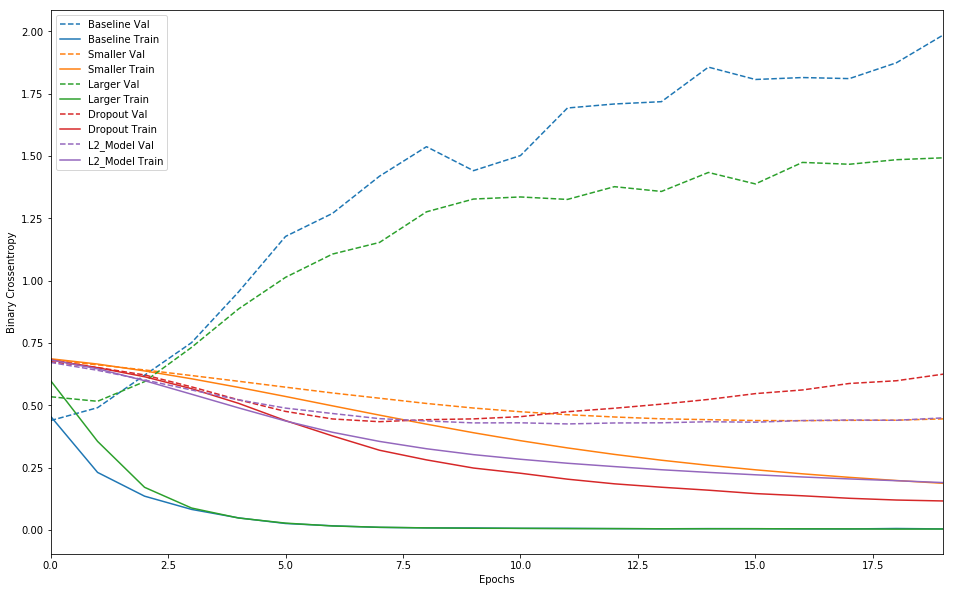

In [23]:
plot_overfitting([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('larger',larger_history),
              ('dropout', dpt_model_history),
              ('l2_model', l2_model_history)])


In [ ]:
plot_accuracy([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('larger',larger_history),
              ('dropout', dpt_model_history),
              ('l2_model_history', l2_model_history)])


# Prediciton

In [ ]:
# Load the saved models
# new_baseline_model = load_model('usat_baseline.model')
new_dpt_model = load_model('usat_dpt.model')

In [ ]:
# Make Prediction

comment = "@united last night we waited forever at the gate because someone from corporate dispatch FORGOT to call the crew #unfriendlyskies"
comment = input("please input your comment")

X_test =  [comment]
# X_ensemble = np.r_[X_test,X_train]

# X_ensemble_vec = tfidfvectorizer.fit_transform(X_ensemble)
# X_test_vec = X_ensemble_vec[0]


X_test_vec = tfidfvectorizer.transform(X_test)

# predictions_baseline = new_baseline_model.predict(X_test_vec)
predictions = new_dpt_model.predict(X_test_vec)


# if round(predictions_baseline[0][0]) == 0:
#     print("baseline: the comment is", "Negative")
# else:
#     print("baseline: non-negative")

if round(predictions[0][0]) == 0:
    print("dropout: the comment is", "Negative")
else:
    print("droput: Positive")

    
    

# Testing: Twitter Real-time opinion of UnitedAirlines

In [ ]:
def get_prediction(comment):

    
    from keras.models import load_model  # to load saved model
    new_dpt_model = load_model('usat_dpt.model')

    X_test =  [comment]
    X_test_vec = tfidfvectorizer.transform(X_test)
    predictions = new_dpt_model.predict(X_test_vec)

    if round(predictions[0][0]) == 0:
        return "Negative Sentiment"
    else:
        return "Positive Sentiment"



In [ ]:
get_prediction("This class is great! #ISOM5240") # testing module that filter the hashtag


'Positive Sentiment'

In [ ]:
import tweepy
import csv
import pandas as pd
####input your credentials here


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
#####United Airlines
# Open/Create a file to append data
csvFile = open('ua.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#unitedAIRLINES",count=100,
                           lang="en",
                           since="2017-05-30").items():
    try:
        predicted_sentiment = get_prediction(tweet.text)
    except:
        predicted_sentiment = ''
    
    print (tweet.created_at, tweet.text[0:20], "=>", predicted_sentiment)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'), predicted_sentiment.encode('utf-8')])

2019-05-31 15:22:46 @united This guy was => Positive Sentiment
2019-05-31 15:19:45 Flying the friendly  => Positive Sentiment
2019-05-31 14:55:59 Looking at the brigh => Positive Sentiment
2019-05-31 14:19:22 A huge thanks to @un => Positive Sentiment
2019-05-31 13:42:29 @united It's honestl => Negative Sentiment
2019-05-31 13:29:29 #UAL #UnitedAirlines => Negative Sentiment
2019-05-31 12:57:41 RT @flybyJAS: #Unite => Negative Sentiment
2019-05-31 12:56:30 #UnitedAirlines flig => Positive Sentiment
2019-05-31 12:41:23 I will never fly wit => Negative Sentiment
2019-05-31 11:29:39 @united I submitted  => Negative Sentiment
2019-05-31 11:22:51 Do any of these airl => Positive Sentiment
2019-05-31 09:58:53 RT @nonrevnick: Such => Negative Sentiment
2019-05-31 09:31:28 What’s the point in  => Negative Sentiment
2019-05-31 08:39:08 @united @nytimestrav => Negative Sentiment
2019-05-31 07:53:35 Tags: #boeing #b737  => Positive Sentiment
2019-05-31 06:47:28 United CEO Oscar Mun => Positive Se

2019-05-29 01:31:50 RT @SNspotter53: An  => Positive Sentiment
2019-05-29 01:20:00 An United 737 taxiin => Positive Sentiment
2019-05-29 01:00:57 RT @KrikorYeretzian: => Negative Sentiment
2019-05-29 00:42:42 United and American  => Positive Sentiment
2019-05-29 00:26:14 Never fly United Air => Negative Sentiment
2019-05-29 00:25:44 @UNITEDA1RLINES 
#un => Negative Sentiment
2019-05-29 00:22:25 19 airlines have cla => Negative Sentiment
2019-05-29 00:21:42 #unitedAIRLINES what => Negative Sentiment
2019-05-29 00:04:05 United Flight Return => Negative Sentiment
2019-05-29 00:00:54 $897* &amp; up -- Fl => Positive Sentiment
2019-05-28 23:48:23 The flight delay hap => Negative Sentiment
2019-05-28 23:44:06 #unitedairlines know => Negative Sentiment
2019-05-28 22:53:58 @united @united plea => Positive Sentiment
2019-05-28 22:45:56 Been stuck on the ta => Negative Sentiment
2019-05-28 21:17:34 I’m about to board a => Positive Sentiment
2019-05-28 20:55:38 @united Hello again  => Positive Se

### Add Dropout Model - Possitive

In [ ]:
import tweepy
import csv
import pandas as pd

database = "database.sqlite"
connection = sql.connect(database)
query = '''SELECT * FROM Tweets'''
df = pd.read_sql_query(query, connection)


#One-hot encoding

df['airline_sentiment'].replace('negative',0, inplace=True)
df['airline_sentiment'].replace('neutral',0, inplace=True)
df['airline_sentiment'].replace('positive',1, inplace=True)
dataset = df.values # covert the pandas dataframe to numpy array



validation_split_ratio = 0.8
validation_split = int(round(validation_split_ratio*dataset.shape[0],0))

X_train = dataset[0:validation_split,10]
X_train_vec = tfidfvectorizer.fit_transform(X_train)

X_validation = dataset[validation_split:,10]
X_validation_vec = tfidfvectorizer.transform(X_validation)

Y_train = dataset[0:validation_split,1]
Y_validation = dataset[validation_split:,1]
NUM_WORDS = X_train_vec.shape[1]
# print(NUM_WORDS) #number of words in the dictionary



dpt_model_pos = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)), #NUM_WORDS = 12766
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model_pos.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

print(X_train_vec.shape)
dpt_model_pos_history = dpt_model_pos.fit(X_train_vec, Y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(X_validation_vec, Y_validation),
                                  verbose=2)
dpt_model_pos.save('usat_dpt_pos.model')   #HDF5 format


In [ ]:
# evaluate the dpt_model model
scores_dpt_pos = dpt_model_pos.evaluate(X_validation_vec, Y_validation)
print("\n{}: {:.2f}".format(dpt_model_pos.metrics_names[1], 
                            scores_dpt_pos[1]*100))


In [ ]:
plot_accuracy([('Negativeness', dpt_model_history),
              ('Positiveness', dpt_model_pos_history)])


In [ ]:
# code18
def get_prediction_pos(comment):

    
    from keras.models import load_model  # to load saved model
    new_dpt_model = load_model('usat_dpt_pos.model')

    X_test =  [comment]
    X_test_vec = tfidfvectorizer.transform(X_test)
    prediction = new_dpt_model.predict(X_test_vec)
#     print('prediction_pos = ',0)
#     return prediction
    if round(prediction[0][0]) == 0:
        return "Negative Sentiment"
    else:
        return "Positive Sentiment"


In [ ]:
get_prediction_pos("good")

In [ ]:
def get_prediction_final(comment):
    foo = get_prediction(comment) + get_prediction_pos(comment)
    if foo == 0:
        return "Negative"
    elif foo == 1:
        return "Neutral"
    elif foo == 2:
        return "Positive"
    else:
        return foo



# Testing Set: Live Demo v1.0


![title](ISOM5240_channel.png)
https://twitter.com/search?q=%23ISOM5240&src=typd&lang=en![image.png](attachment:image.png)

In [ ]:
# code20
# import tweepy
import csv
import pandas as pd
import tweepy


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

csvFile = open('ua.csv', 'a') # Open/Create a file to append data
csvWriter = csv.writer(csvFile) #Use csv Writer

ctr = 1
for tweet in tweepy.Cursor(api.search,q="#ISOM5240",count=5,
                           lang="en",
                           since="2017-04-03").items():
    text_to_predict = tweet.text.replace('#ISOM5240', '')
    try: 
        sentiment_predicted = get_prediction_pos(text_to_predict)
    except: 
        sentiment_predicted = ""
    
    print(ctr, " ", tweet.created_at, tweet.user.screen_name,":", text_to_predict, '=>',sentiment_predicted)
    #     print (ctr, " ", tweet.created_at, tweet.user.screen_name, tweet.text, get_prediction(tweet.text).replace('#ISOM5240', ''))
    ctr += 1
    
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

![title](ISOM5240_channel.png)
https://twitter.com/search?q=%23ISOM5240&src=typd&lang=en![image.png](attachment:image.png)